In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 1st load test and train data 
# Load training data from CSV file
train_data = pd.read_csv('../input/training_extra.csv')  
test_data = pd.read_csv('../input/test.csv')  

In [3]:
train_data

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461
...,...,...,...,...,...,...,...,...,...,...,...
3694313,4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3694314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3694315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3694316,4194316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [4]:
# Print detailed information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694318 entries, 0 to 3694317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 310.0+ MB
None


In [5]:
print(train_data.describe())

                 id  Compartments  Weight Capacity (kg)         Price
count  3.694318e+06  3.694318e+06          3.692648e+06  3.694318e+06
mean   2.347158e+06  5.434022e+00          1.800883e+01  8.135820e+01
std    1.066458e+06  2.893227e+00          6.974541e+00  3.893050e+01
min    5.000000e+05  1.000000e+00          5.000000e+00  1.500000e+01
25%    1.423579e+06  3.000000e+00          1.206854e+01  4.747778e+01
50%    2.347158e+06  5.000000e+00          1.805243e+01  8.098592e+01
75%    3.270738e+06  8.000000e+00          2.398580e+01  1.148434e+02
max    4.194317e+06  1.000000e+01          3.000000e+01  1.500000e+02


In [6]:
# Check for missing values in each column
print(train_data.isnull().sum())

id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64


In [7]:
# id , compartments etc  havent missing values , and brand etc.. have misssing values

# Calculate the percentage of missing values for each column
missing_percentage = train_data.isnull().sum() / len(train_data) * 100
print(missing_percentage)

id                      0.000000
Brand                   3.168460
Material                2.777644
Size                    2.197699
Compartments            0.000000
Laptop Compartment      2.465651
Waterproof              2.362385
Style                   2.604270
Color                   3.347492
Weight Capacity (kg)    0.045205
Price                   0.000000
dtype: float64


In [8]:
duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
# above none of the values exceed 5% , their for this  dataset is well-structured
#  to remove rows (or columns) that contain missing values
train_data = train_data.dropna()
print(train_data.isnull().sum())


id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


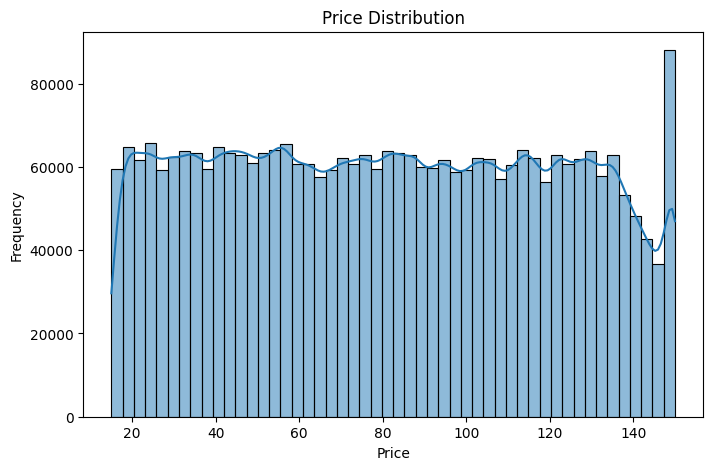

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

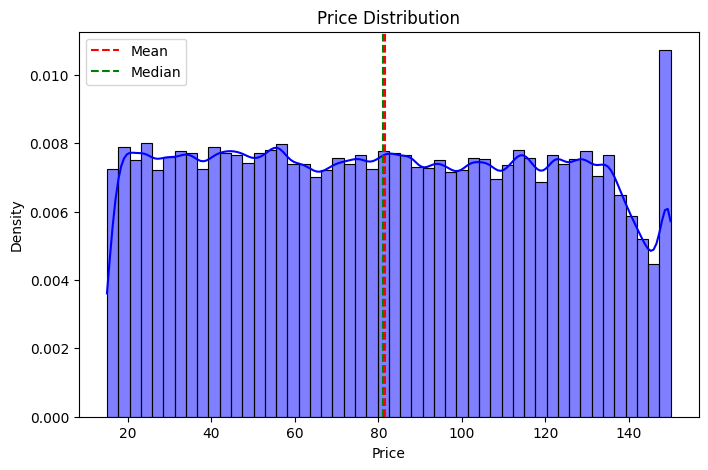

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Price'], bins=50, kde=True, color='blue', stat='density')
plt.axvline(train_data['Price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(train_data['Price'].median(), color='green', linestyle='--', label='Median')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()


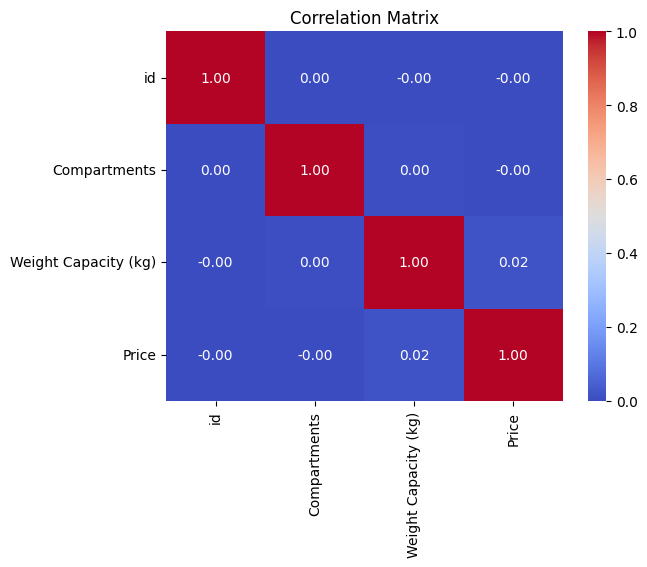

In [12]:
# Select only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

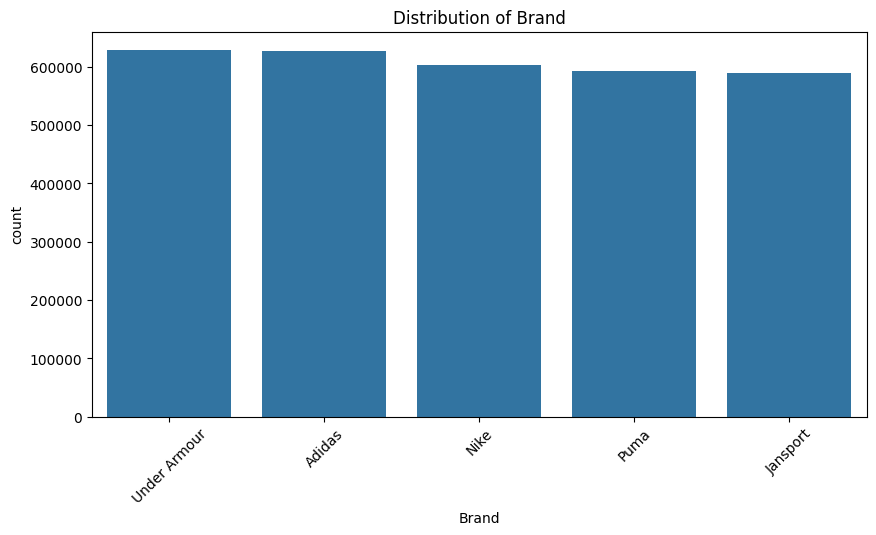

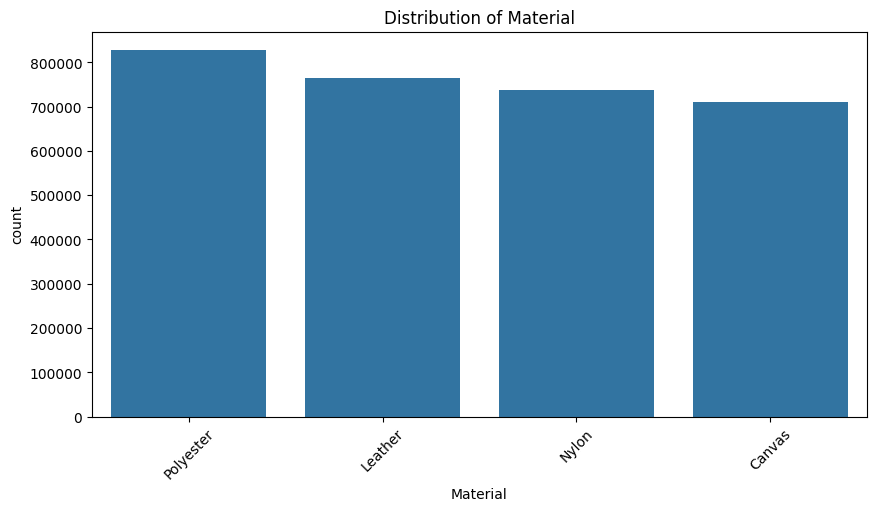

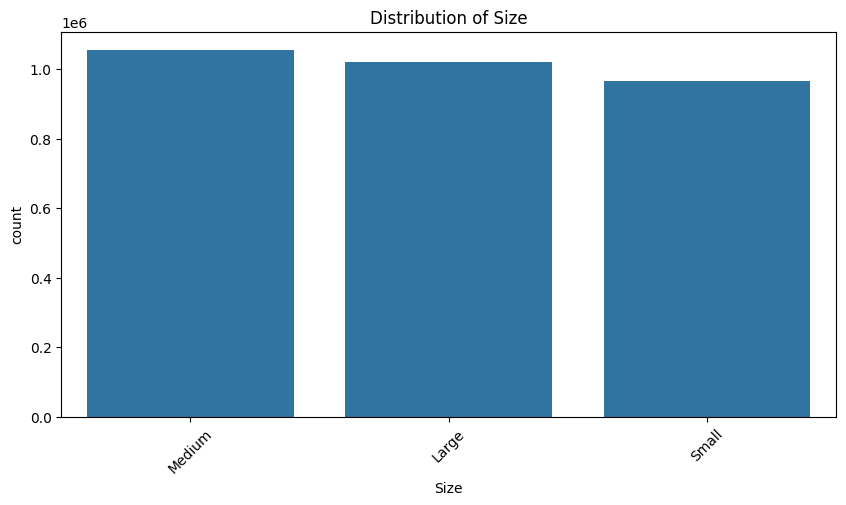

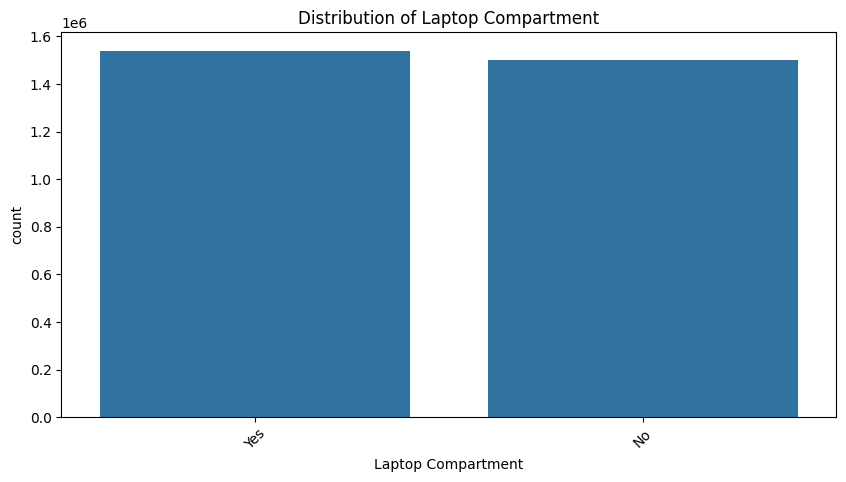

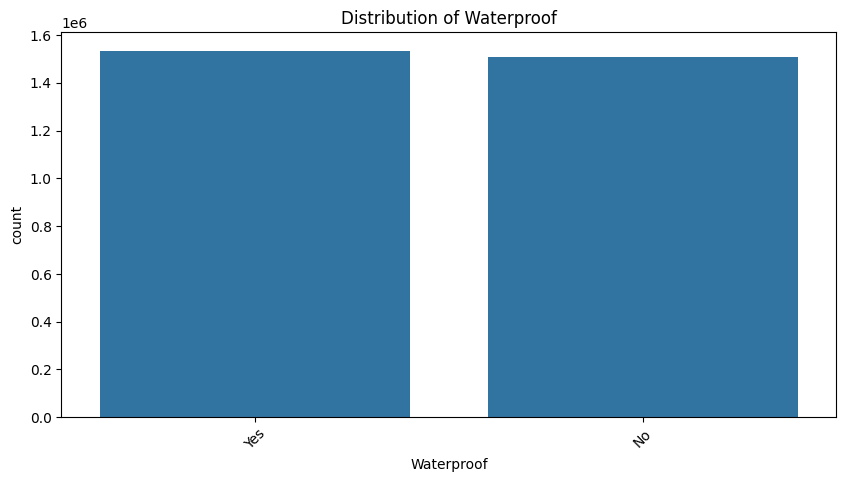

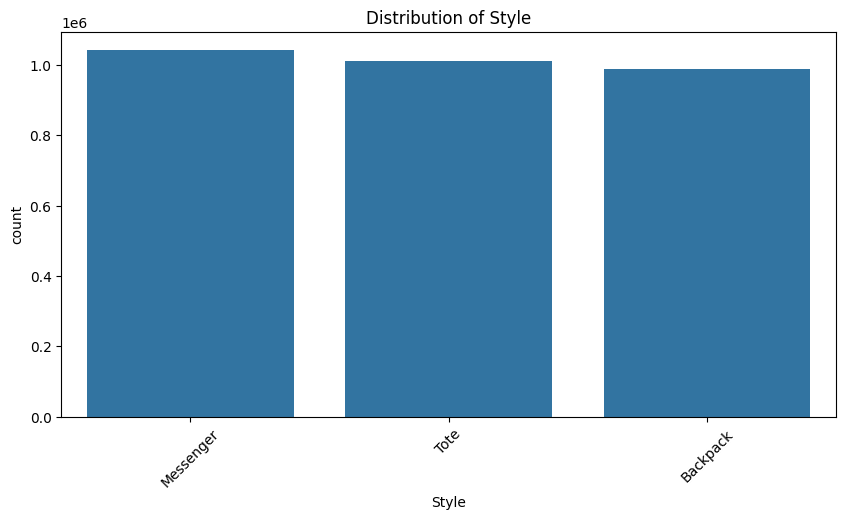

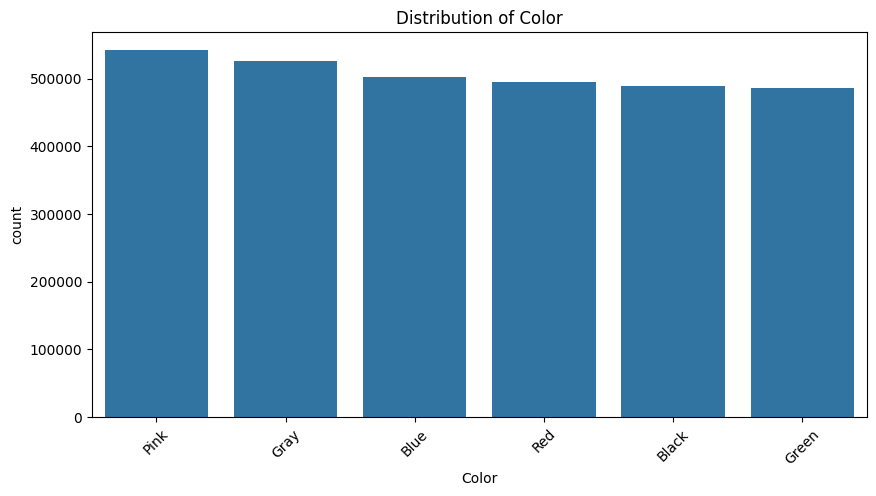

In [13]:
# categorical_columns = ["Brand", "Material", "Size", "Style", "Color"]
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


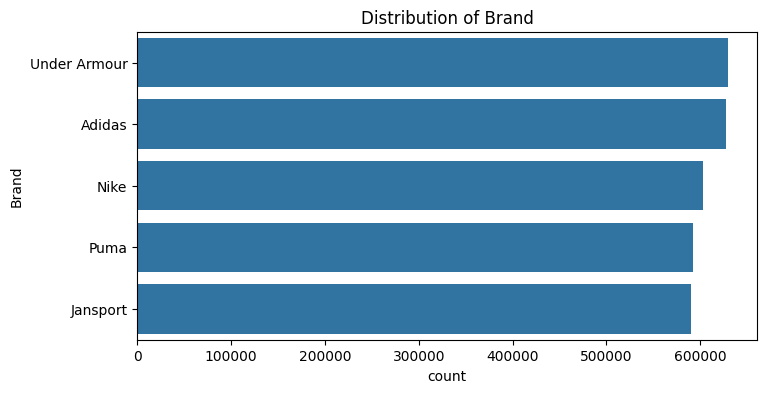

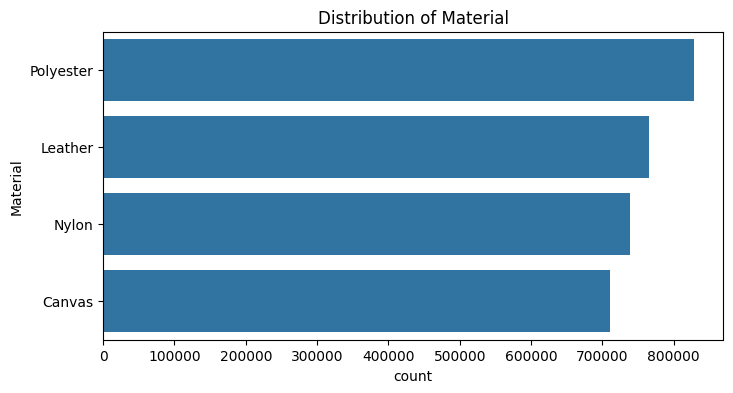

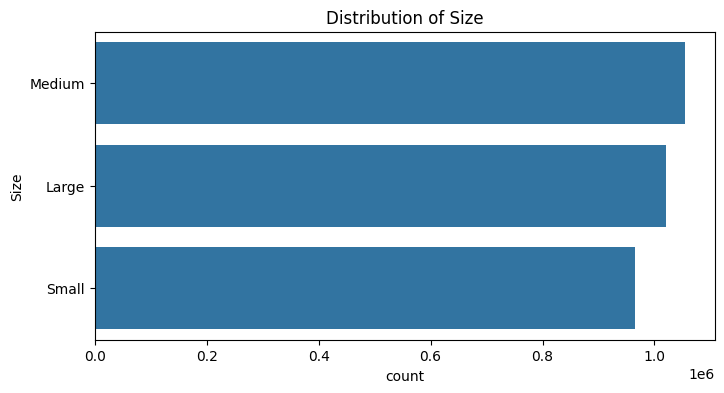

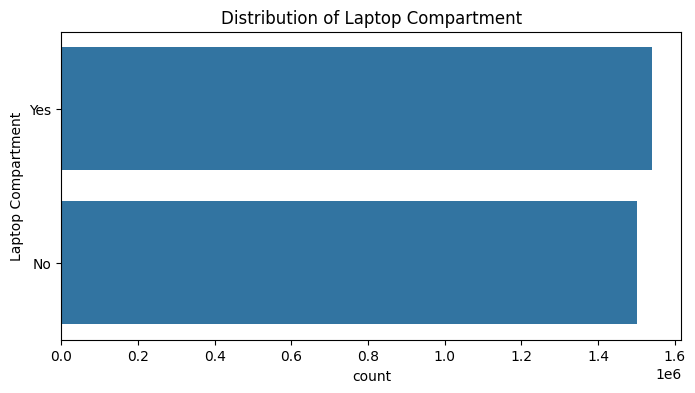

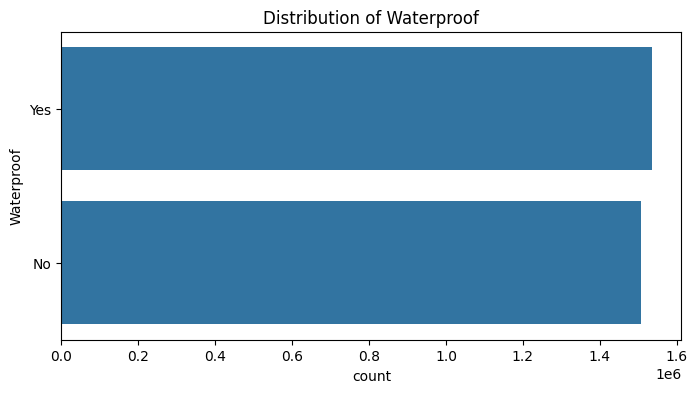

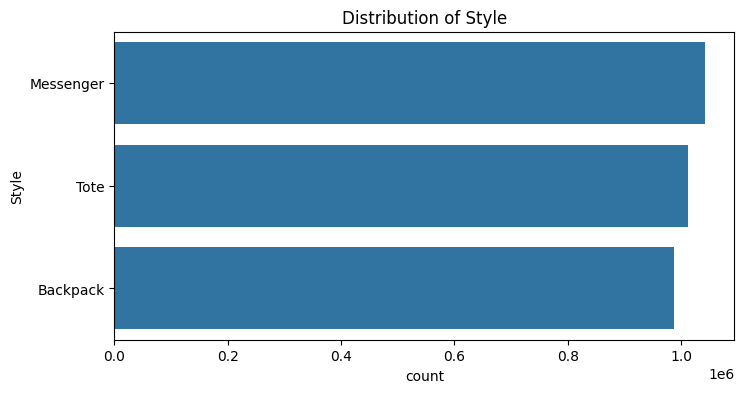

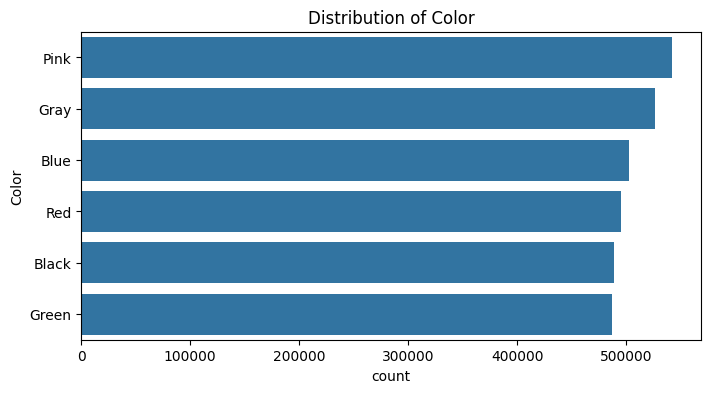

In [14]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=train_data[col], order=train_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

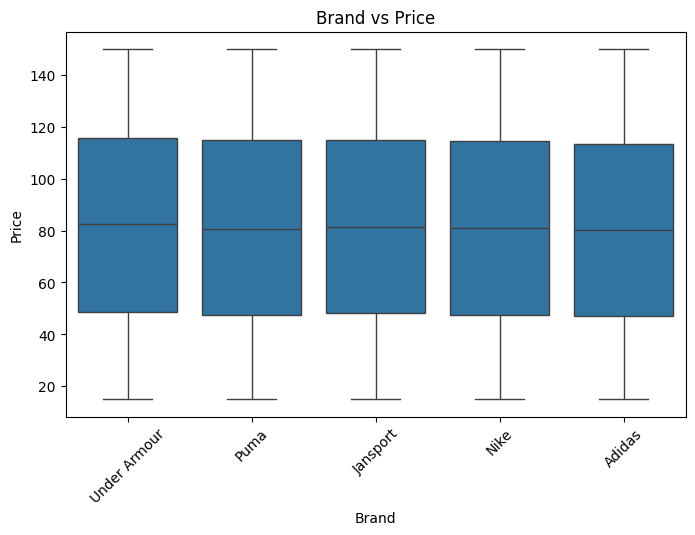

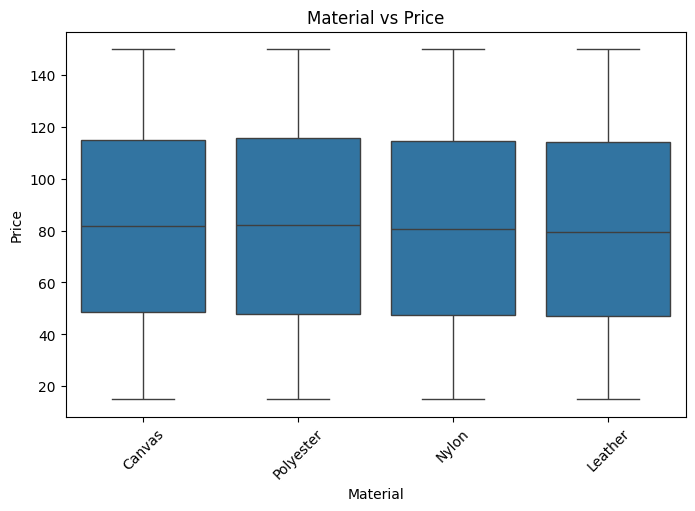

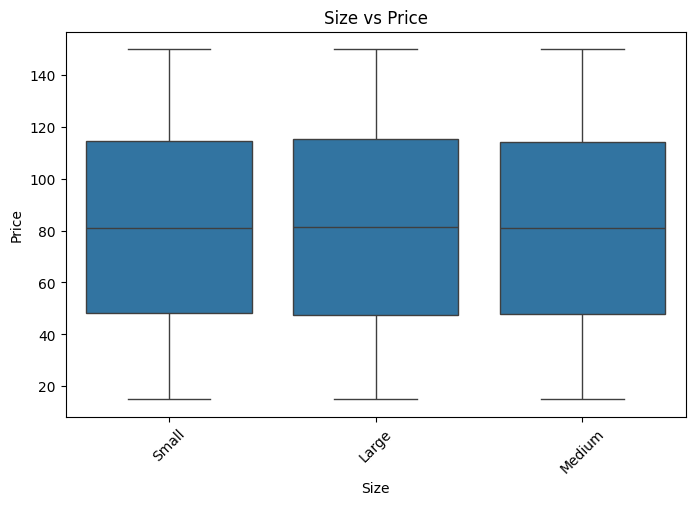

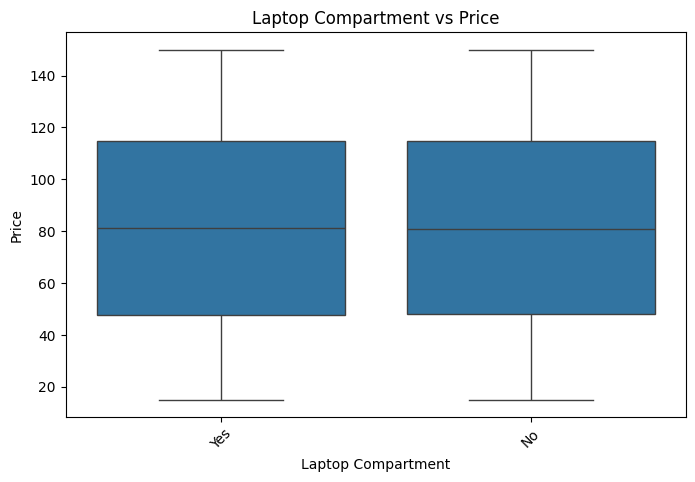

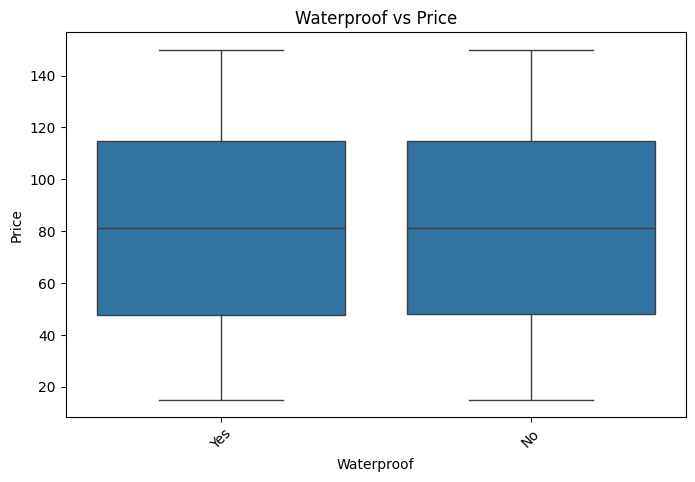

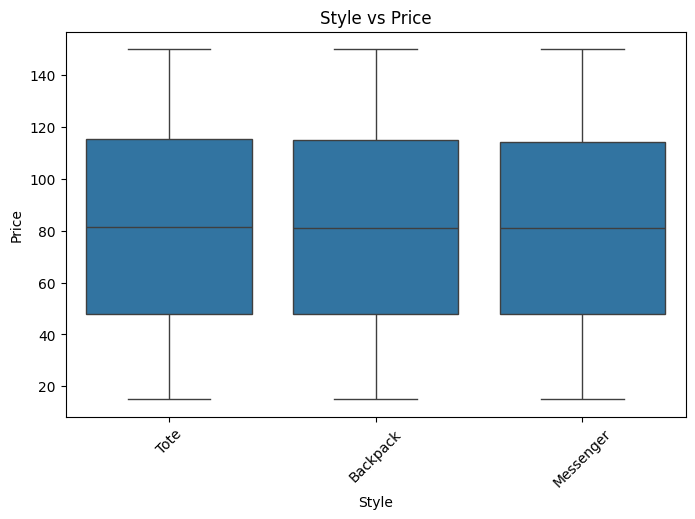

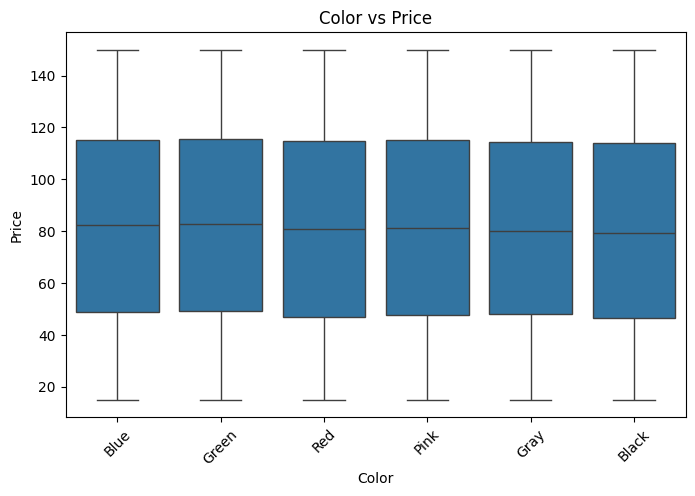

In [15]:
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_data[col], y=train_data["Price"])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Price")
    plt.show()

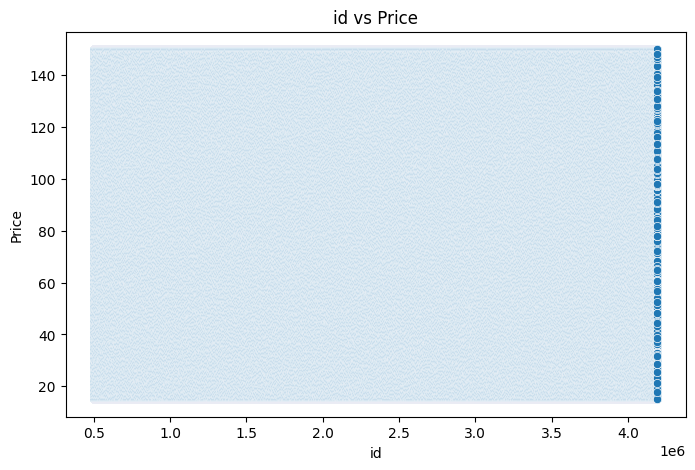

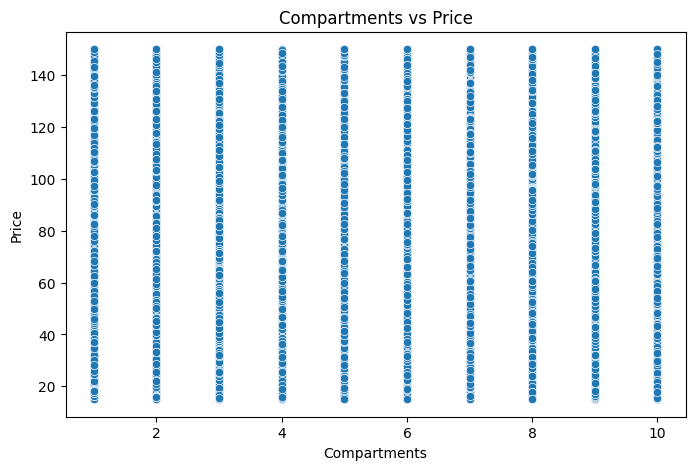

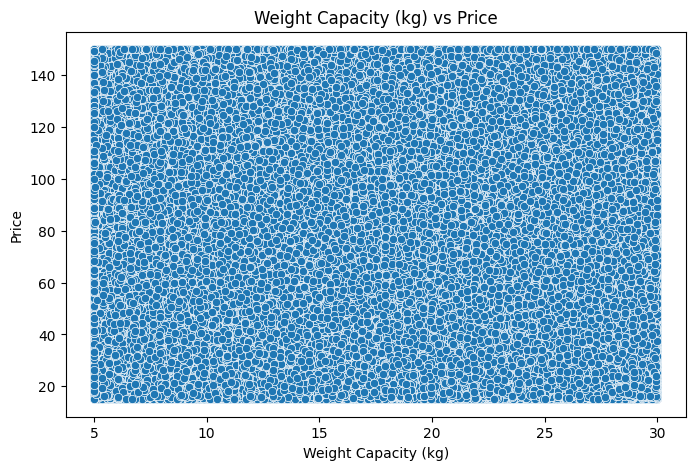

In [16]:
numerical_cols = train_data.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove("Price")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train_data[col], y=train_data["Price"])
    plt.title(f"{col} vs Price")
    plt.show()

In [17]:
# Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# Feature Scaling and Encoding Categorical Variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Applying Different Preprocessing Steps to Different Columns
from sklearn.compose import ColumnTransformer
# Automating the Workflow
from sklearn.pipeline import Pipeline
# Handling Missing Values
from sklearn.impute import SimpleImputer

In [18]:
# Separate features and target
X = train_data.drop(columns=['id', 'Price'])  # Drop ID and target column
y = train_data['Price']

In [19]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [20]:
# Preprocessing for numerical data: Impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                 # Scale features
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 38.802228212375724


In [22]:
import xgboost
print(xgboost.__version__)

2.1.4


In [ ]:
from xgboost import XGBRegressor

# Create a pipeline with preprocessing and XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1))
])

# Train the model
model.fit(X_train, y_train)


# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 38.78500884068168


In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best RMSE: 38.77548858134475


In [25]:
# Prepare the test data
X_test = test_data.drop(columns=['id'])

# Make predictions
test_predictions = model.predict(X_test)

# Save predictions to a CSV file
submission = pd.DataFrame({'id': test_data['id'], 'Price': test_predictions})
submission.to_csv('submission.csv', index=False)

In [26]:
import pickle

with open('model3.pickle', 'wb') as file:
    pickle.dump(model, file)

In [27]:
print(model.feature_names_in_)


['Brand' 'Material' 'Size' 'Compartments' 'Laptop Compartment'
 'Waterproof' 'Style' 'Color' 'Weight Capacity (kg)']


In [28]:
import pickle
import pandas as pd

# Load the trained model
with open('model3.pickle', 'rb') as f:
    model = pickle.load(f)

# Define input features with all expected columns
# input_features = {
#     # 'ID': [500000],  # Assuming ID is not used for prediction, it can be ignored
#     'Brand': ['Puma'],
#     'Material': ['Canvas'],
#     'Size': ['Small'],
#     'Weight Capacity (kg)': [24.882052195806214],
#     'Waterproof': [False],  # Convert 'Yes' -> True, 'No' -> False
#     'Laptop Compartment': [False],
#     'Compartments': [10.0],
#     'Style': ['Tote'],
#     'Color': ['Blue']
# }
input_features = {
    'Brand': ['Puma'],
    'Material': ['Polyester'],
    'Size': ['Small'],
    'Weight Capacity (kg)': [11.869095352089928],
    'Waterproof': [False],  # 'No' -> False
    'Laptop Compartment': [True],  # 'Yes' -> True
    'Compartments': [4.0],
    'Style': ['Backpack'],
    'Color': ['Green']
}

# Convert to DataFrame
input_data = pd.DataFrame(input_features)

# Make prediction
prediction = model.predict(input_data)

print("Prediction:", prediction)


Prediction: [84.87289]
